<a href="https://colab.research.google.com/github/Tanmoym047/CSE_3207_Assignment/blob/main/CSE_3207_2103118.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# ============================
# CSE 3207 - Naive Bayes Project
# Dataset: diabetes_risk_prediction_dataset.csv
# ============================

from google.colab import drive
drive.mount('/content/drive')

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# ============================
# 1. Load Dataset from Drive
# ============================

# 👇 CHANGE THIS PATH according to your Google Drive location
DATA_PATH = "/content/drive/MyDrive/diabetes_risk_prediction_dataset.csv"

assert os.path.exists(DATA_PATH), f"File not found at {DATA_PATH}"

df = pd.read_csv(DATA_PATH)

print("✅ Dataset loaded successfully!")
print("Shape:", df.shape)
df.head()


✅ Dataset loaded successfully!
Shape: (520, 17)


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive



Column names:
 ['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching', 'Irritability', 'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity', 'class']

Data types:
 Age                    int64
Gender                object
Polyuria              object
Polydipsia            object
sudden weight loss    object
weakness              object
Polyphagia            object
Genital thrush        object
visual blurring       object
Itching               object
Irritability          object
delayed healing       object
partial paresis       object
muscle stiffness      object
Alopecia              object
Obesity               object
class                 object
dtype: object

Missing values per column:
 Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush      

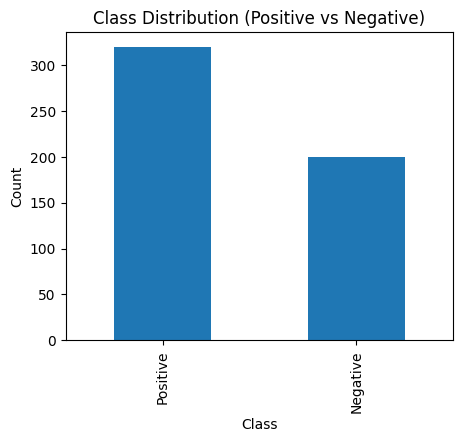

In [11]:
# ============================
# 2. Basic Exploration
# ============================

print("\nColumn names:\n", df.columns.tolist())

print("\nData types:\n", df.dtypes)

print("\nMissing values per column:\n", df.isna().sum())

print("\nClass distribution (target 'class'):\n", df['class'].value_counts())

# Plot class balance
plt.figure(figsize=(5,4))
df['class'].value_counts().plot(kind='bar')
plt.title("Class Distribution (Positive vs Negative)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


In [12]:
# ============================
# 3. Preprocessing
# ============================

# 3.1 Target encoding: Positive -> 1, Negative -> 0
df['class'] = df['class'].map({'Positive': 1, 'Negative': 0})

# Double check mapping
print(df['class'].value_counts())

# 3.2 Separate features and target
X = df.drop('class', axis=1)
y = df['class']

# 3.3 One-Hot Encode categorical features
# (Age is numeric; others likely categorical (Yes/No, Male/Female, etc.))
X_encoded = pd.get_dummies(X, drop_first=True)

print("\nOriginal feature shape:", X.shape)
print("Encoded feature shape:", X_encoded.shape)

# 3.4 Train-test split (80% train, 20% test), stratified on class
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

print("\nTrain shape:", X_train.shape, "Test shape:", X_test.shape)


class
1    320
0    200
Name: count, dtype: int64

Original feature shape: (520, 16)
Encoded feature shape: (520, 16)

Train shape: (416, 16) Test shape: (104, 16)


In [13]:
# ============================
# 4. Naive Bayes Model
# ============================

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_test)

# ============================
# 5. Evaluation for Naive Bayes
# ============================

acc_nb = accuracy_score(y_test, y_pred_nb)
prec_nb = precision_score(y_test, y_pred_nb)
rec_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)
cm_nb = confusion_matrix(y_test, y_pred_nb)

print("===== Naive Bayes Performance =====")
print(f"Accuracy : {acc_nb:.4f}")
print(f"Precision: {prec_nb:.4f}")
print(f"Recall   : {rec_nb:.4f}")
print(f"F1-score : {f1_nb:.4f}\n")

print("Confusion Matrix (Naive Bayes):\n", cm_nb)

print("\nClassification Report (Naive Bayes):\n")
print(classification_report(y_test, y_pred_nb, target_names=["Negative", "Positive"]))


===== Naive Bayes Performance =====
Accuracy : 0.9423
Precision: 0.9677
Recall   : 0.9375
F1-score : 0.9524

Confusion Matrix (Naive Bayes):
 [[38  2]
 [ 4 60]]

Classification Report (Naive Bayes):

              precision    recall  f1-score   support

    Negative       0.90      0.95      0.93        40
    Positive       0.97      0.94      0.95        64

    accuracy                           0.94       104
   macro avg       0.94      0.94      0.94       104
weighted avg       0.94      0.94      0.94       104



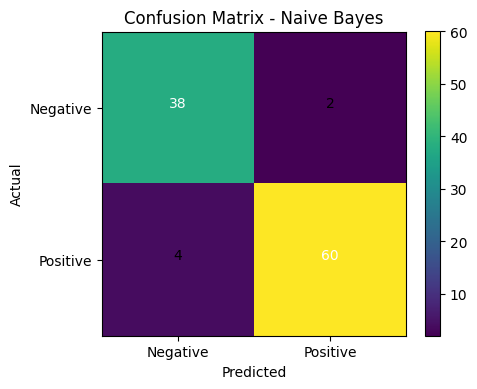

In [14]:
# ============================
# 6. Plot Confusion Matrix - Naive Bayes
# ============================

plt.figure(figsize=(5,4))
plt.imshow(cm_nb, interpolation='nearest')
plt.title("Confusion Matrix - Naive Bayes")
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ["Negative", "Positive"])
plt.yticks(tick_marks, ["Negative", "Positive"])

thresh = cm_nb.max() / 2.0
for i in range(cm_nb.shape[0]):
    for j in range(cm_nb.shape[1]):
        plt.text(j, i, cm_nb[i, j],
                 horizontalalignment="center",
                 color="white" if cm_nb[i, j] > thresh else "black")

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()


In [15]:
# ============================
# 7. Comparison Model - Decision Tree
# ============================

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

acc_dt = accuracy_score(y_test, y_pred_dt)
prec_dt = precision_score(y_test, y_pred_dt)
rec_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
cm_dt = confusion_matrix(y_test, y_pred_dt)

print("===== Decision Tree Performance =====")
print(f"Accuracy : {acc_dt:.4f}")
print(f"Precision: {prec_dt:.4f}")
print(f"Recall   : {rec_dt:.4f}")
print(f"F1-score : {f1_dt:.4f}\n")

print("Confusion Matrix (Decision Tree):\n", cm_dt)

print("\nClassification Report (Decision Tree):\n")
print(classification_report(y_test, y_pred_dt, target_names=["Negative", "Positive"]))


===== Decision Tree Performance =====
Accuracy : 0.9904
Precision: 1.0000
Recall   : 0.9844
F1-score : 0.9921

Confusion Matrix (Decision Tree):
 [[40  0]
 [ 1 63]]

Classification Report (Decision Tree):

              precision    recall  f1-score   support

    Negative       0.98      1.00      0.99        40
    Positive       1.00      0.98      0.99        64

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



In [16]:
# ============================
# 7. Comparison Model - Logistic Regression
# ============================

log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

acc_log = accuracy_score(y_test, y_pred_log)
prec_log = precision_score(y_test, y_pred_log)
rec_log = recall_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log)
cm_log = confusion_matrix(y_test, y_pred_log)

print("===== Logistic Regression Performance =====")
print(f"Accuracy : {acc_log:.4f}")
print(f"Precision: {prec_log:.4f}")
print(f"Recall   : {rec_log:.4f}")
print(f"F1-score : {f1_log:.4f}\n")

print("Confusion Matrix (Logistic Regression):\n", cm_log)

print("\nClassification Report (Logistic Regression):\n")
print(classification_report(y_test, y_pred_log, target_names=["Negative", "Positive"]))


===== Logistic Regression Performance =====
Accuracy : 0.9423
Precision: 0.9833
Recall   : 0.9219
F1-score : 0.9516

Confusion Matrix (Logistic Regression):
 [[39  1]
 [ 5 59]]

Classification Report (Logistic Regression):

              precision    recall  f1-score   support

    Negative       0.89      0.97      0.93        40
    Positive       0.98      0.92      0.95        64

    accuracy                           0.94       104
   macro avg       0.93      0.95      0.94       104
weighted avg       0.95      0.94      0.94       104



In [17]:
# ============================
# 8. Compare Naive Bayes vs Decision Tree vs Logistic Regression
# ============================

results_df = pd.DataFrame({
    "Model": ["Naive Bayes", "Decision Tree", "Logistic Regression"],
    "Accuracy":  [acc_nb, acc_dt, acc_log],
    "Precision": [prec_nb, prec_dt, prec_log],
    "Recall":    [rec_nb, rec_dt, rec_log],
    "F1-score":  [f1_nb, f1_dt, f1_log]
})

print(results_df.to_string(index=False, float_format="%.4f"))


              Model  Accuracy  Precision  Recall  F1-score
        Naive Bayes    0.9423     0.9677  0.9375    0.9524
      Decision Tree    0.9904     1.0000  0.9844    0.9921
Logistic Regression    0.9423     0.9833  0.9219    0.9516
